# Problem 4

Adopt the Acceptance-Rejection method to estimate the value of $\pi$, then evaluate the performance of Monte Carlo algorithms with finite number of samples.

## Solution

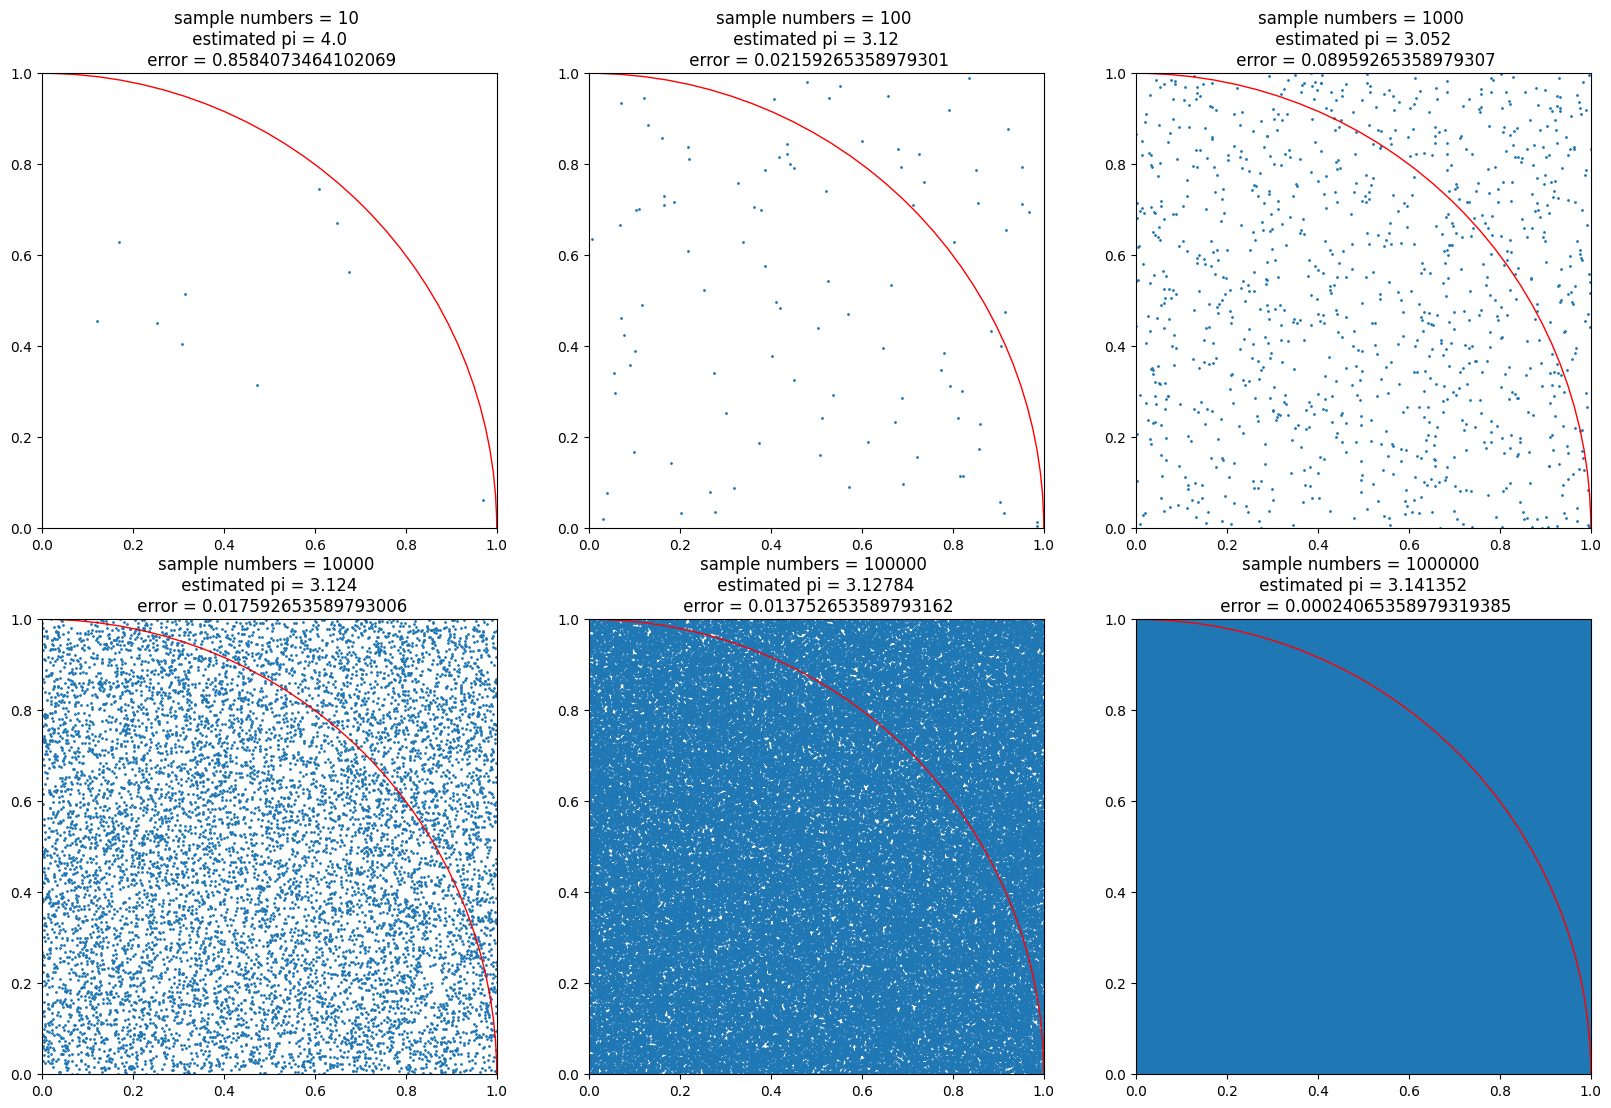

In [7]:
import numpy as np
import matplotlib.pyplot as plt

sample_nums = [10, 100, 1000, 10000, 100000, 1000000]

plt.figure(figsize=(20, 13))

for i, n_sample in enumerate(sample_nums):
    x = np.random.uniform(0, 1, n_sample)
    y = np.random.uniform(0, 1, n_sample)

    plt.subplot(2, 3, i+1)
    # set the figure as a square
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(x, y, s=1)
    plt.title(f"sample numbers = {n_sample} \n estimated pi = {4 * np.sum(x**2 + y**2 < 1) / n_sample} \n error = {np.abs(np.pi - 4 * np.sum(x**2 + y**2 < 1) / n_sample)}")
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # plot the circle in the first quadrant
    circle = plt.Circle((0, 0), 1, color='r', fill=False)
    plt.gca().add_artist(circle)
plt.show()

## Analysis

100%|██████████| 99001/99001 [01:16<00:00, 1299.79it/s]


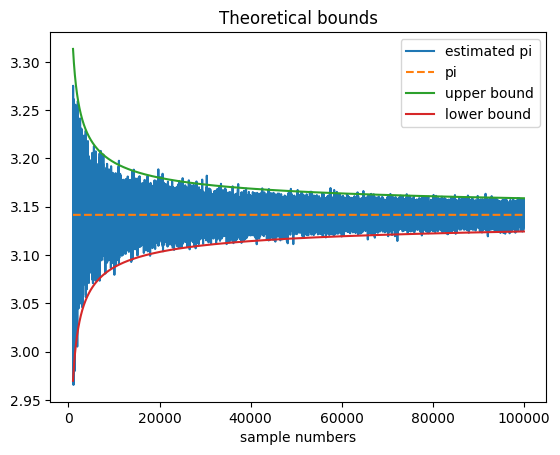

In [8]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
delta = 0.05
start_point = 1000
n_sample = 100000

index       = np.zeros(n_sample - start_point + 1)
estimation  = np.zeros(n_sample - start_point + 1)
lower_bound = np.zeros(n_sample - start_point + 1)
upper_bound = np.zeros(n_sample - start_point + 1)

for sample_num in tqdm.tqdm(range(start_point, n_sample+1)):
    X = np.random.uniform(0, 1, sample_num)
    Y = np.random.uniform(0, 1, sample_num)
    idx = sample_num - start_point
    index[idx] = sample_num
    estimation[idx] = 4 * np.sum(X**2 + Y**2 < 1) / sample_num
    lower_bound[idx] = np.pi - np.sqrt(8 * np.log(2 / delta) / sample_num)
    upper_bound[idx] = np.pi + np.sqrt(8 * np.log(2 / delta) / sample_num)

plt.plot(index, estimation, label='estimated pi')
plt.plot(index, np.pi * np.ones(n_sample - start_point + 1), label='pi', linestyle='--')
plt.plot(index, upper_bound, label='upper bound')
plt.plot(index, lower_bound, label='lower bound')

plt.legend()
plt.xlabel('sample numbers')
plt.title('Theoretical bounds')
plt.show()

# Problem 5

Sampling from probability distributions. Show histograms and compare them to corresponding PDFs.

(a) Sampling from the standard Normal distribution with both the Box-Muller method and the Acceptance-Rejection method. Discuss the pros and cons of both methods.

(b) Sampling from the distribution with the following pdf:
$$f(x) \propto \exp \left(-\frac{1}{2} x^2\right)\left(\sin ^2(6 x)+3 \cos ^2(x) \sin ^2(4 x)+1\right)$$

## Solution(a)
1. Box-Muller method:

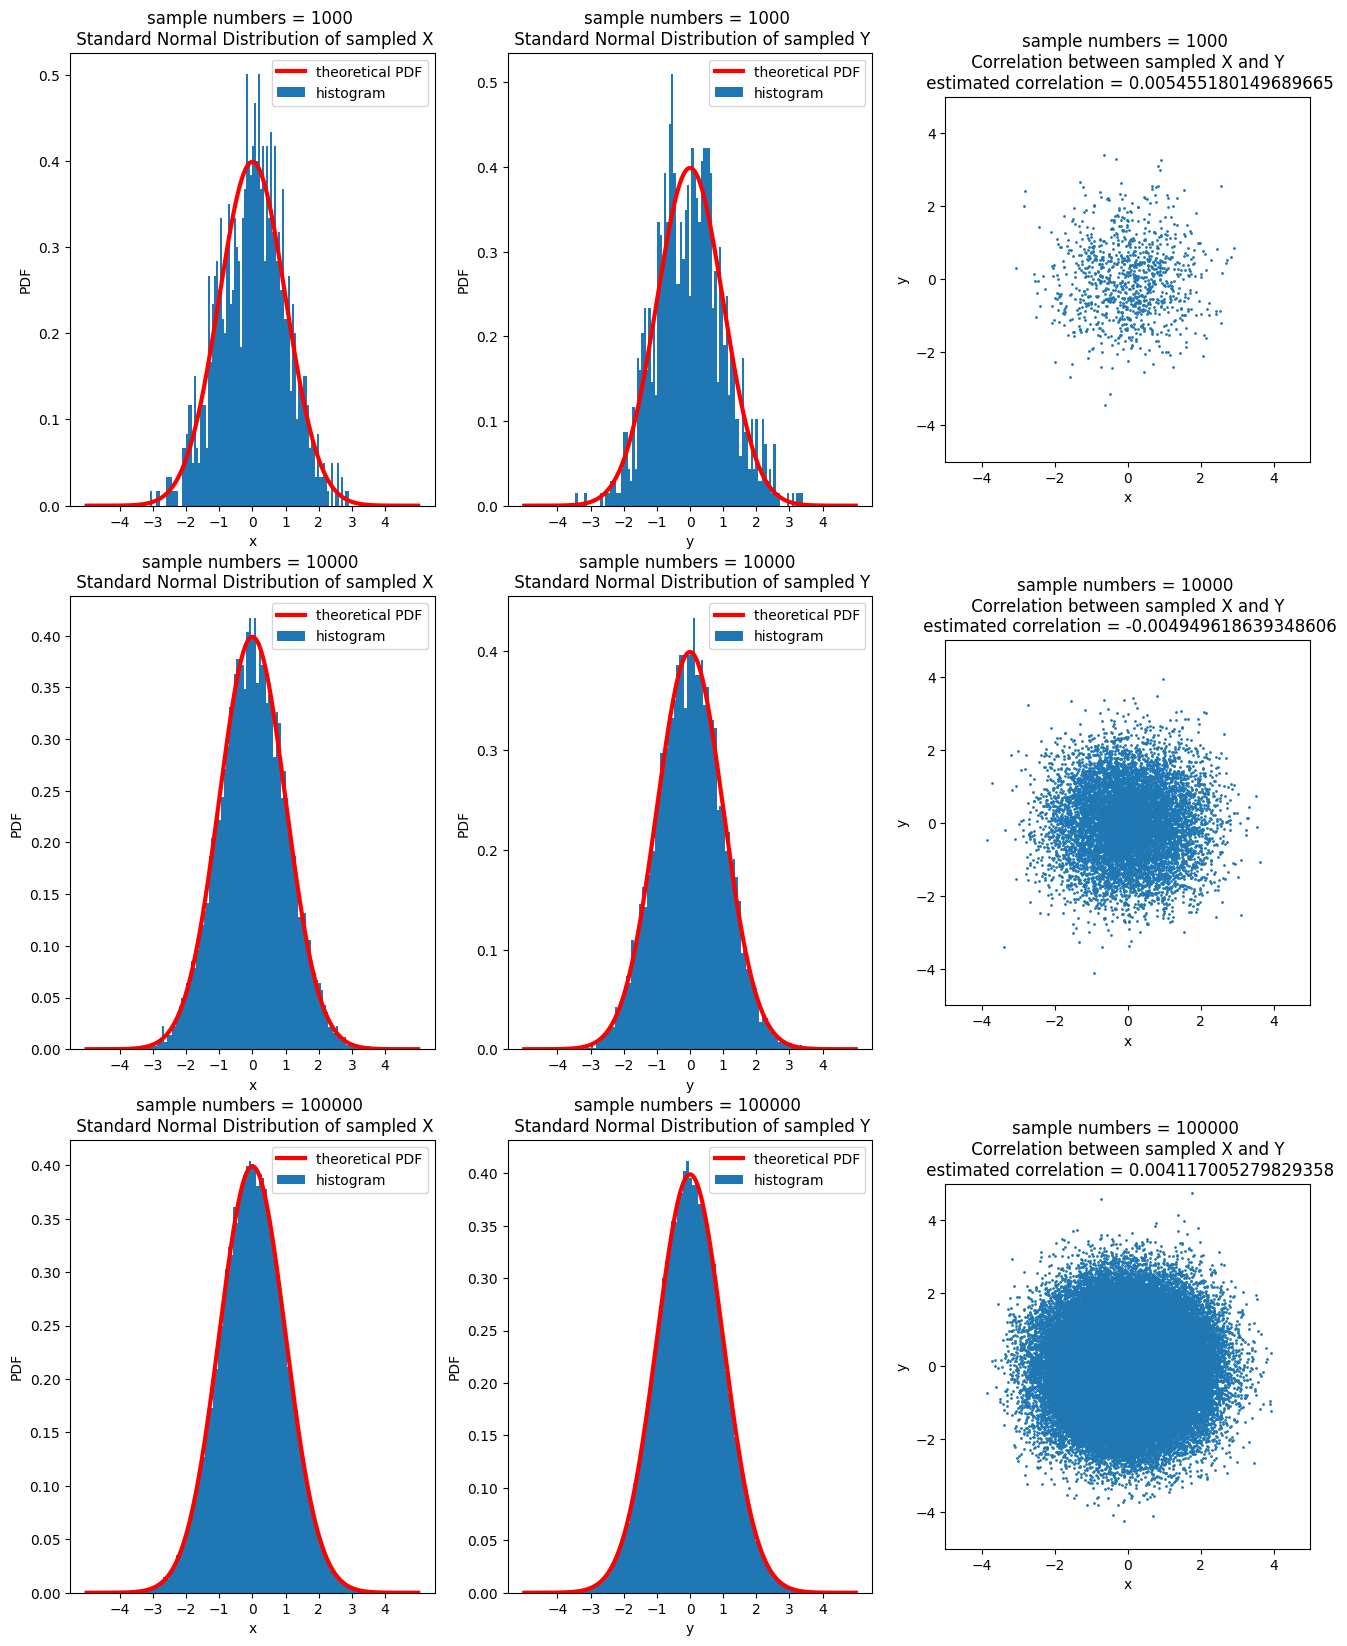

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

sample_nums = [1000, 10000, 100000]
plt.figure(figsize=(16, 20))

# Theoretical PDF of the standard Gaussian distribution
x = np.linspace(-5, 5, 1000)
pdf = 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

for i, n_sample in enumerate(sample_nums):

    u1 = np.random.uniform(0, 1, n_sample)
    u2 = np.random.uniform(0, 1, n_sample)
    sampled_x = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    sampled_y = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    # show sampled_x and its theoretical PDF
    plt.subplot(3, 3, i * 3 + 1)
    plt.hist(sampled_x, bins = 100, density = True)
    # plt.plot(x, pdf) plot it wider and deeper color
    plt.plot(x, pdf, color='r', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(f'sample numbers = {n_sample} \n Standard Normal Distribution of sampled X')
    plt.legend(['theoretical PDF','histogram'])
    plt.xticks(np.arange(-4, 5))

    # show the sampled_y and its theoretical PDF
    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(sampled_y, bins = 100, density = True)
    plt.plot(x, pdf, color='r', linewidth=3)
    plt.xlabel('y')
    plt.ylabel('PDF')
    plt.title(f'sample numbers = {n_sample} \n Standard Normal Distribution of sampled Y')
    plt.legend(['theoretical PDF','histogram'])
    plt.xticks(np.arange(-4, 5))

    # show the correlation between sampled_x and sampled_y
    # let the figure be a square
    plt.subplot(3, 3, i * 3 + 3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(sampled_x, sampled_y, s=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.title(f'sample numbers = {n_sample} \n Correlation between sampled X and Y \n estimated correlation = {np.corrcoef(sampled_x, sampled_y)[0, 1]}')
plt.show()

## Solution(a)
2. Acceptance-Rejection method:

  0%|          | 0/100000 [00:00<?, ?it/s]C:\Users\13540\AppData\Local\Temp\ipykernel_7236\3671767400.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i] = y
100%|██████████| 100000/100000 [00:00<00:00, 211237.06it/s]


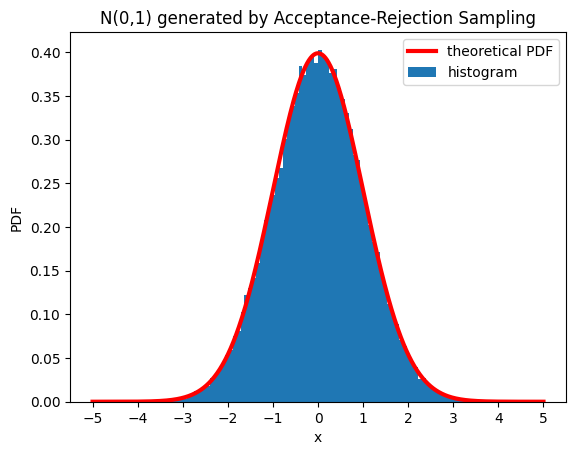

In [ ]:
n_samples = 100000

# Exponential Distribution
def exponential_inverse(x): # the inverse of the exponential distribution
    return -np.log(1 - x)

def inverse_transform_sampling(sample_size): # inverse transform sampling
    u = np.random.uniform(0, 1, sample_size) # uniform random numbers
    return exponential_inverse(u)

# Y ~ Expo(1)
Y = inverse_transform_sampling(n_samples) # sample points using inverse transform sampling
FoverG = np.exp(- 1 / 2 * ((Y - 1) ** 2))
Z = np.zeros(n_samples)
U = np.random.uniform(0, 1, len(Z))

for i in tqdm.tqdm(range(n_samples)):
    if FoverG[i] >= U[i]:
        Z[i] = Y[i]
    else:
        while True:
            y = inverse_transform_sampling(1)
            foverg = np.exp(- 1 / 2 * ((y - 1) ** 2))
            if np.random.uniform(0, 1) <= foverg:
                Z[i] = y
                break

U = np.random.uniform(0, 1, len(Z))
X = np.where(U > 1 / 2, Z, -Z)

plt.hist(X, bins=100, density=True) # histogram of X

# N(0,1) PDF
def normal(x): # the PDF of N(0,1)
    return np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)

# theoretical PDF
x = np.linspace(-5, 5, 1000) # sample points for plotting pdf
pdf = normal(x) # pdf values at sample points
plt.plot(x, pdf, color='r', linewidth=3)

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('N(0,1) generated by Acceptance-Rejection Sampling')
plt.legend(['theoretical PDF','histogram'])
plt.xticks(np.arange(-5,6))
plt.show()

## Solution(b)

The normalization constant is: 5.8943372668734035


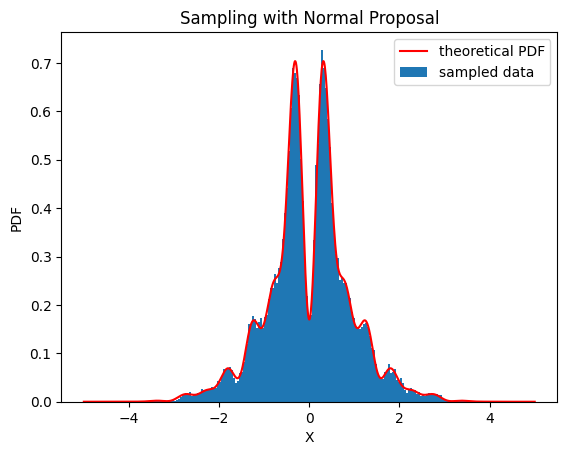

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 100000
X = []

x = np.linspace(-5, 5, 1000)
pdf = np.exp(-x ** 2 / 2) * (np.sin(6 * x) ** 2 + 3 * np.cos(x) ** 2 * np.sin(4 * x) ** 2 + 1)
normalization_constant = np.trapezoid(pdf, x)
print(f'The normalization constant is: {normalization_constant}')
pdf = pdf / normalization_constant  # normalize y
plt.plot(x, pdf, color='r', label='theoretical PDF')

for _ in range(n_samples):
    Y = np.random.normal(0, 1)
    U = np.random.uniform(0, 1)

    c = 5
    accept_ratio = (np.sin(6 * Y) ** 2 + 3 * np.cos(Y) ** 2 * np.sin(4 * Y) ** 2 + 1) / c

    if U <= accept_ratio:
        X.append(Y)

plt.hist(X, bins=200, density=True, label='sampled data')

plt.legend()
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Sampling with Normal Proposal')
plt.show()

# Problem 6

Given a random variable $X \sim \mathcal{N}(0,1)$, evaluate the tail probability $c=P(X>8)$ by Monte Carlo methods with \& without importance sampling. Discuss the pros and cons of importance sampling.

## Solution

## with importance sampling:

In [30]:
n_samples = 100000
sum = 0
for _ in range(n_samples):
    Y = np.random.normal(8, 1)
    if Y > 8:
        sum += np.exp(-8 * Y + 32)
sum /= n_samples
print("P(Y > 8) = ", sum)

P(Y > 8) =  6.252836307280847e-16


## without importrance sampling:

In [8]:
import numpy as np

n_sample = 10 ** 9
X = np.random.normal(0, 1, n_sample)
# get number of samples that are greater than 8
n = np.sum(X > 8)
print("P(X > 8) = ", n / n_sample)

P(X > 8) =  0.0


# Problem 7

Generate uniform distributions over the following geometric objects:
(a) Elliptic $(a=2, b=1)$:
$$E_2(a, b)=\left\{(x, y) \in \mathbb{R}^2:\left(\frac{x}{a}\right)^2+\left(\frac{y}{b}\right)^2 \leq 1\right\}$$

(b) Sphere $(r=1)$:
$$S_2(r)=\left\{(x, y, z) \in \mathbb{R}^3: x^2+y^2+z^2=r^2\right\}$$

(c) Ball $(r=1)$:
$$B_3(r)=\left\{(x, y, z) \in \mathbb{R}^3: x^2+y^2+z^2 \leq r^2\right\}$$

(d) Torus $\left(r_0=2, r=1\right)$:
$$T_2\left(r_0, r\right)=\left\{(x, y, z) \in \mathbb{R}^3:\left(r_0-\sqrt{x^2+y^2}\right)^2+z^2=r^2\right\}$$

## Solution(a)

# accept-reject

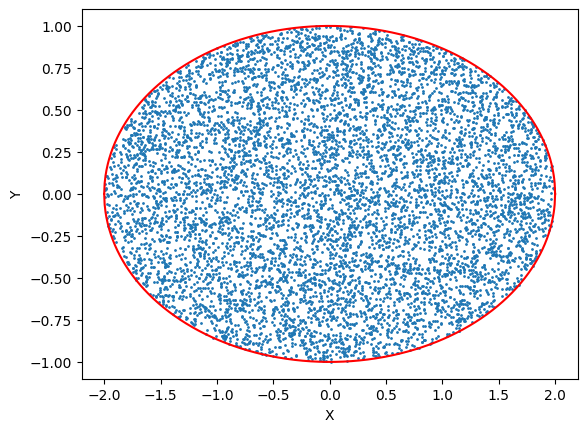

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n_sample = 10000
a, b = 2, 1

X = np.random.uniform(-a, a, n_sample)
Y = np.random.uniform(-b, b, n_sample)

X_accept = X[(X / a) ** 2 + (Y / b) ** 2 <= 1]
Y_accept = Y[(X / a) ** 2 + (Y / b) ** 2 <= 1]

plt.scatter(X_accept ,Y_accept, s=1)
# plot the ellipse
x = np.linspace(-a, a, 1000)
y = b * np.sqrt(1 -(x / a) ** 2)
plt.plot(x, y, color='r')
plt.plot(x, -y, color='r')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Change of variables

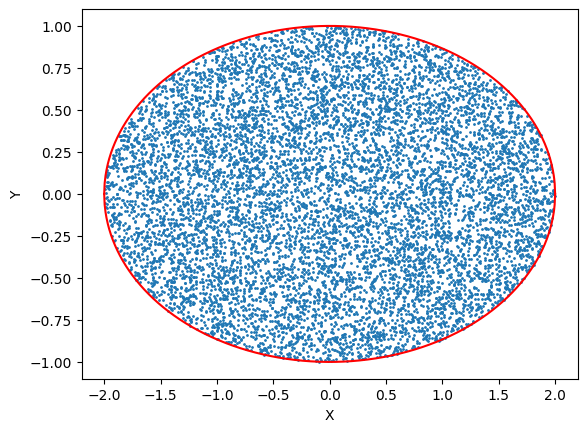

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n_sample = 10000
a, b = 2, 1

U1 = np.random.uniform(0, 1, n_sample)
U2 = np.random.uniform(0, 1, n_sample)
X = a * np.sqrt(U1) * np.cos(2 * np.pi * U2)
Y = b * np.sqrt(U1) * np.sin(2 * np.pi * U2)

plt.scatter(X ,Y, s=1)
# plot the ellipse
x = np.linspace(-a, a, 1000)
y = b * np.sqrt(1 -(x / a) ** 2)
plt.plot(x, y, color='r')
plt.plot(x, -y, color='r')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Solution(b)


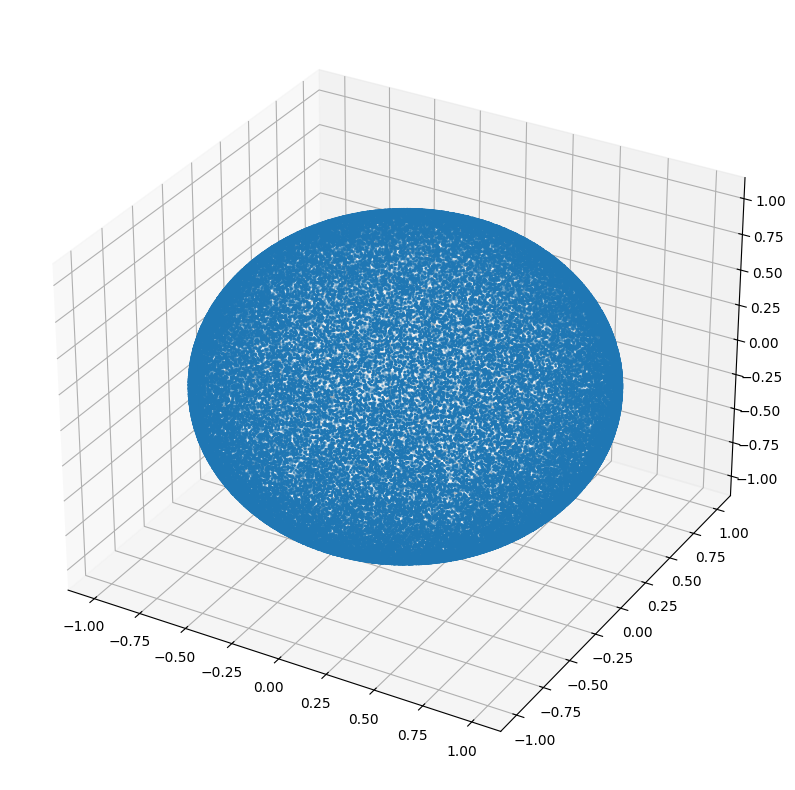

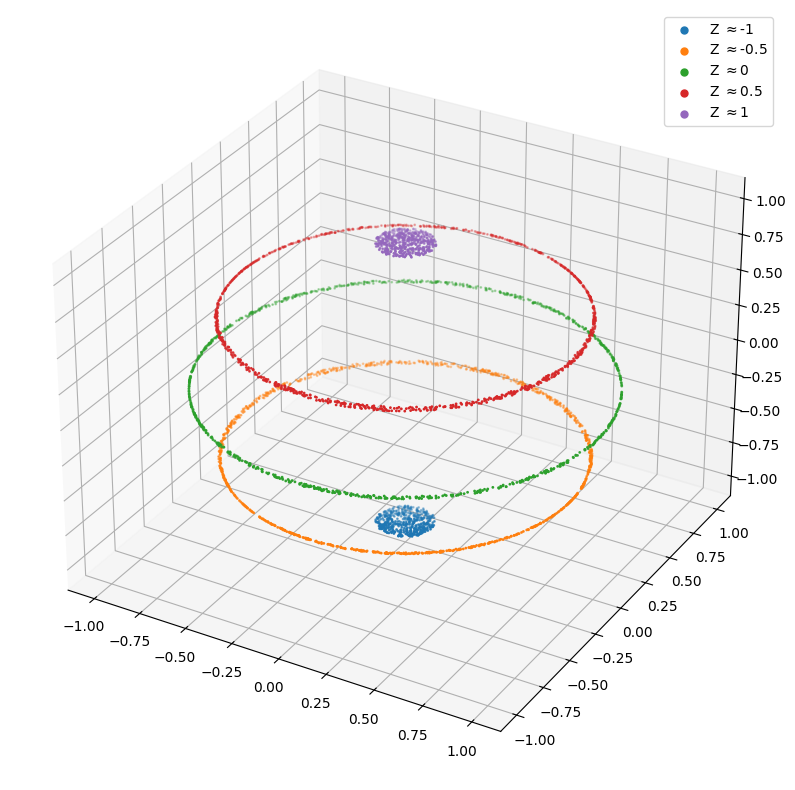

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n_sample = 100000
r = 1

U1 = np.random.uniform(0, 1, n_sample)
U2 = np.random.uniform(0, 1, n_sample)
theta = 2 * np.pi * U1
phi = np.arccos(2 * U2 - 1)

X = r * np.sin(phi) * np.cos(theta)
Y = r * np.sin(phi) * np.sin(theta)
Z = r * np.cos(phi)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=1)
plt.show()

slices = [-1, -0.5, 0, 0.5, 1]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
delta = 0.01
for slice in slices:
    X_clice = X[(slice - delta <= Z) & (Z <= slice + delta)]
    Y_clice = Y[(slice - delta <= Z) & (Z <= slice + delta)]
    Z_clice = Z[(slice - delta <= Z) & (Z <= slice + delta)]
    ax.scatter(X_clice, Y_clice, Z_clice, s=1)
plt.legend(["Z $\\approx$" + str(slice) for slice in slices], markerscale=5)
plt.show()

## Solution(c)


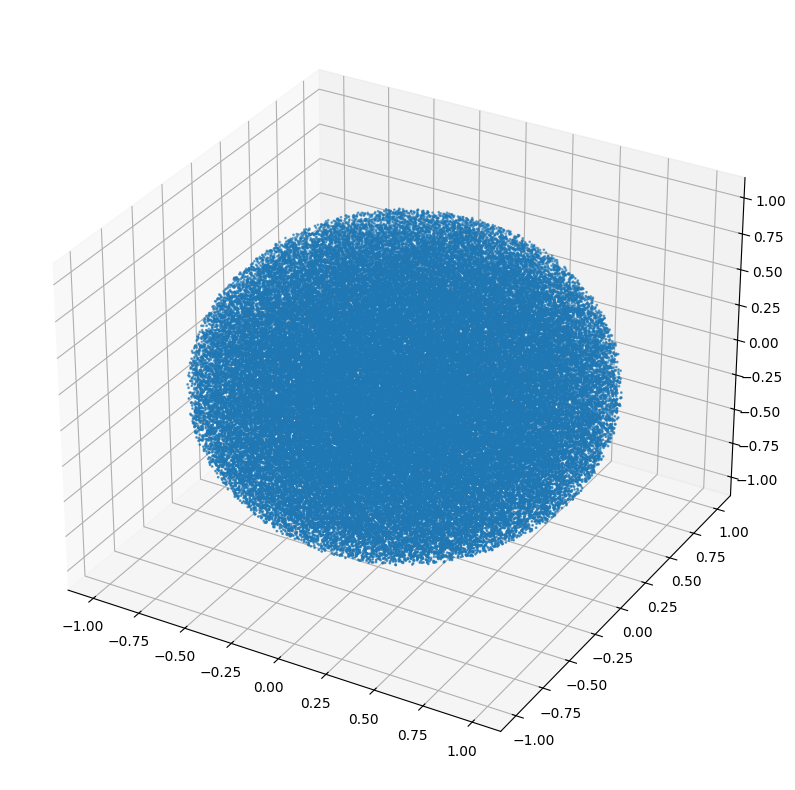

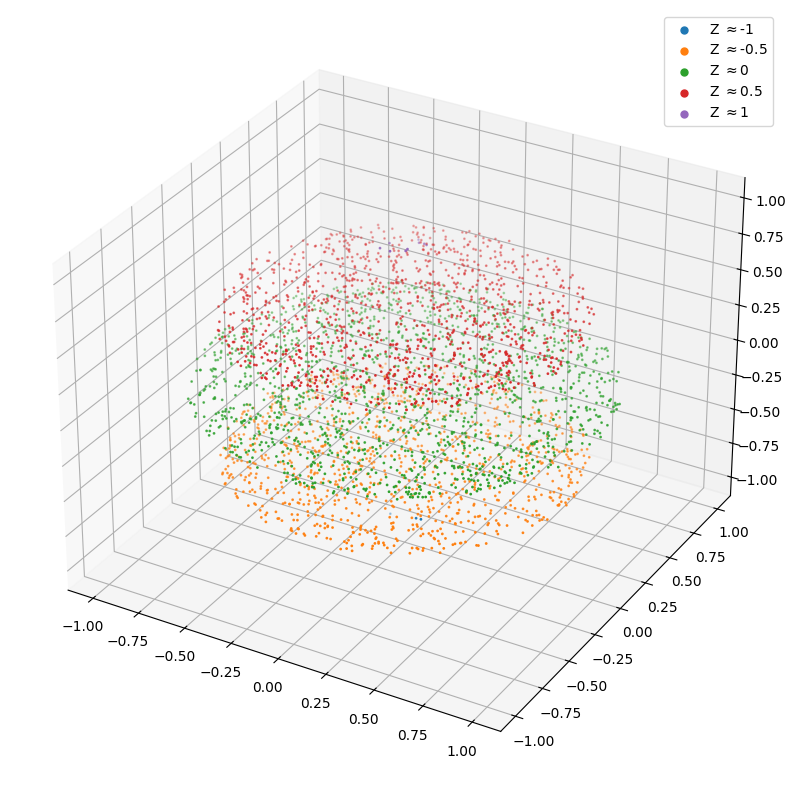

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n_sample = 100000

U1 = np.random.uniform(0, 1, n_sample)
U2 = np.random.uniform(0, 1, n_sample)
U3 = np.random.uniform(0, 1, n_sample)

r = np.power(U1, 1 / 3)
# theta = np.arccos(1 - 2 * U2)
cos_theta = 1 - 2 * U2
sin_theta = 2 * np.sqrt(U2 * (1 - U2))
phi = 2 * np.pi * U3


X = r * sin_theta * np.cos(phi)
Y = r * sin_theta * np.sin(phi)
Z = r * cos_theta

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X, Y, Z, s=1)
plt.show()

slices = [-1, -0.5, 0, 0.5, 1]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
delta = 0.01
for slice in slices:
    X_clice = X[(slice - delta <= Z) & (Z <= slice + delta)]
    Y_clice = Y[(slice - delta <= Z) & (Z <= slice + delta)]
    Z_clice = Z[(slice - delta <= Z) & (Z <= slice + delta)]
    ax.scatter(X_clice, Y_clice, Z_clice, s=1)
plt.legend(["Z $\\approx$" + str(slice) for slice in slices], markerscale=5)
plt.show()

## Solution(d)


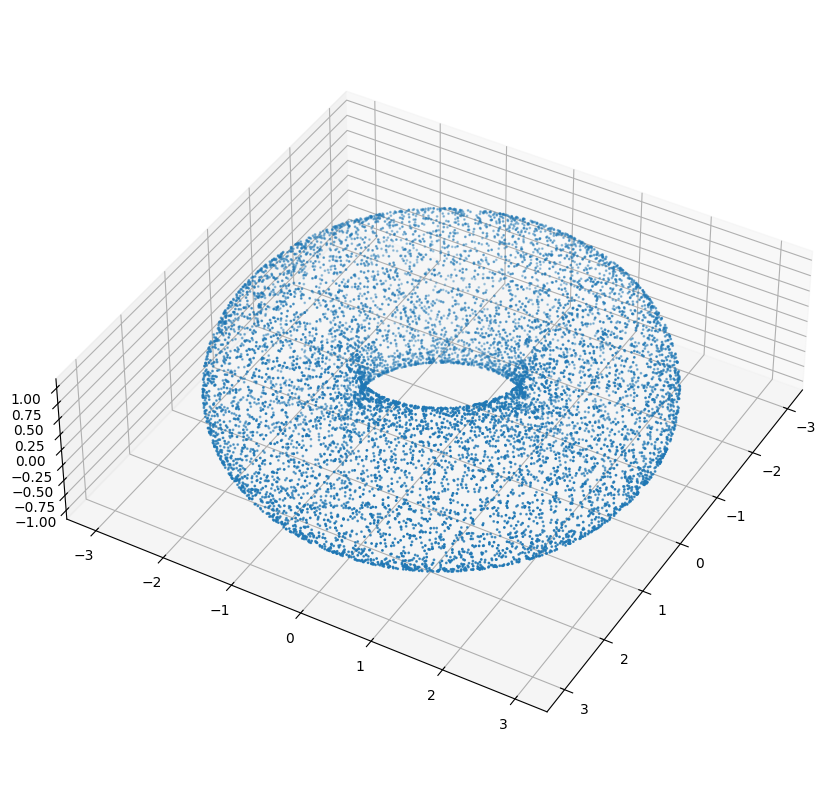

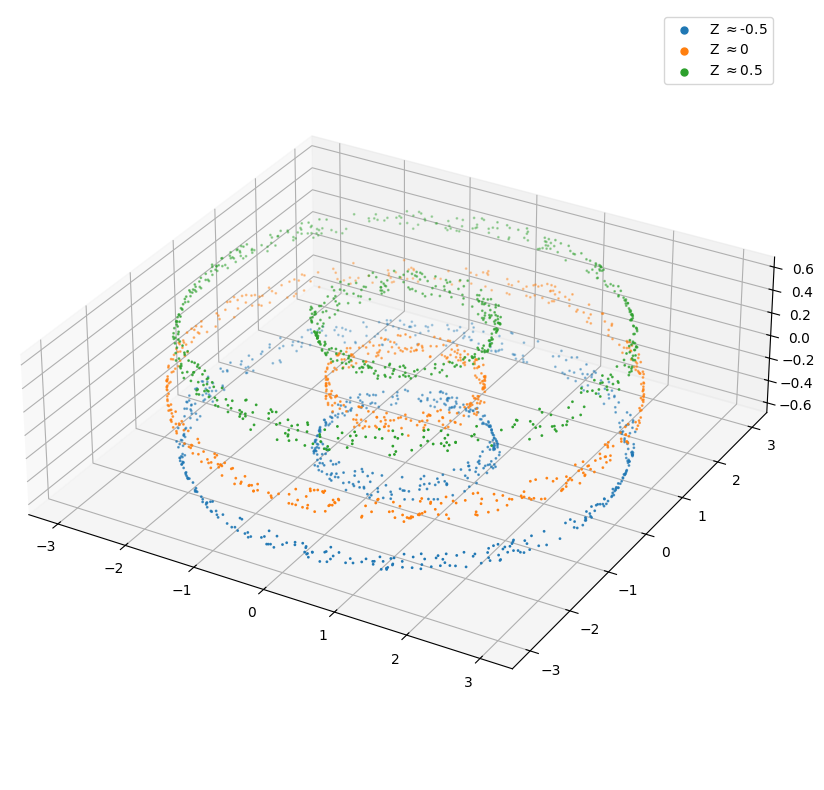

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

n_sample = 10000
r0, r = 2, 1

def equation(theta, U1, r0=2, r=1):
    return 1 / (2 * np.pi) * theta + r / (4 * np.pi * r0) * np.sin(theta) - U1


U1 = np.random.uniform(0, 1, n_sample)
U2 = np.random.uniform(0, 1, n_sample)
theta = [fsolve(equation, x0=0, args=(u1,))[0] for u1 in U1]
phi = 2 * np.pi * U2

X = (r0 + r * np.cos(theta)) * np.cos(phi)
Y = (r0 + r * np.cos(theta)) * np.sin(phi)
Z = r * np.sin(theta)
range_x = X.max() - X.min()
range_y = Y.max() - Y.min()
range_z = Z.max() - Z.min()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X, Y, Z, s=1)
ax.set_box_aspect([range_x, range_y, range_z])
ax.view_init(elev=40, azim=30)
plt.show()

slices = [-0.5, 0, 0.5]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
delta = 0.1
for slice in slices:
    X_clice = X[(slice - delta <= Z) & (Z <= slice + delta)]
    Y_clice = Y[(slice - delta <= Z) & (Z <= slice + delta)]
    Z_clice = Z[(slice - delta <= Z) & (Z <= slice + delta)]
    ax.scatter(X_clice, Y_clice, Z_clice, s=1)
ax.set_box_aspect([range_x, range_y, range_z])
# ax.view_init(elev=40, azim=30)
plt.legend(["Z $\\approx$" + str(slice) for slice in slices], markerscale=5)
plt.show()

# Problem 8

The Curse and Blessing of Dimensionality. Denote $\boldsymbol{x}=\left(x_1, \ldots, x_d\right)$.

(a) The $d$-dimensional hyperball of radius $r$ is denoted as
$$B_d(r)=\left\{\boldsymbol{x} \in \mathbb{R}^d: \sum_{i=1}^d x_i^2 \leq r^2\right\}$$

Find the volume of $B_d(r)$ and plot a figure to show how such volume changes with $d$ when $r=1$.

## Solution

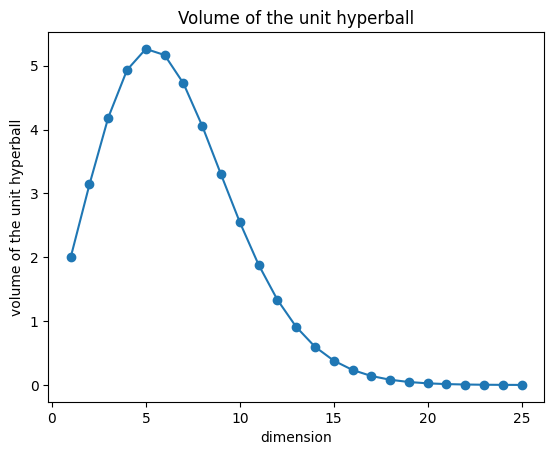

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

dim = []
vol = []
r = 1
for d in range(1, 26):
    volume = (np.pi ** (d / 2)) / math.gamma(d / 2 + 1) * (r ** d)
    dim.append(d)
    vol.append(volume)
plt.plot(dim, vol, marker='o')
plt.xlabel('dimension')
plt.ylabel('volume of the unit hyperball')
plt.title('volume of the unit hyperball')
plt.show()